<a href="https://colab.research.google.com/github/Hazem18/NLP_Task/blob/main/NLP_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.4934 - loss: 0.7582 - val_accuracy: 0.5155 - val_loss: 0.7410 - learning_rate: 5.0000e-04
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.7075 - loss: 0.6819 - val_accuracy: 0.5945 - val_loss: 0.7230 - learning_rate: 5.0000e-04
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.8704 - loss: 0.4197 - val_accuracy: 0.6585 - val_loss: 0.6908 - learning_rate: 5.0000e-04
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9772 - loss: 0.1544 - val_accuracy: 0.7055 - val_loss: 0.7158 - learning_rate: 5.0000e-04
Epoch 5/20
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9953 - loss: 0.0767
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9953 - loss: 0.0767 - val_accuracy: 0.7425 - val_loss: 0.7156 - learning_rate: 5.0000e-04
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.99

Model training complete and saved as simple_rnn_imdb_sentiment.h5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6572 - loss: 0.6920
Test Loss: 0.6908
Test Accuracy: 0.6585
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
              precision    recall  f1-score   support

           0       0.65      0.68      0.67       999
           1       0.67      0.64      0.65      1001

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.66      0.66      0.66      2000



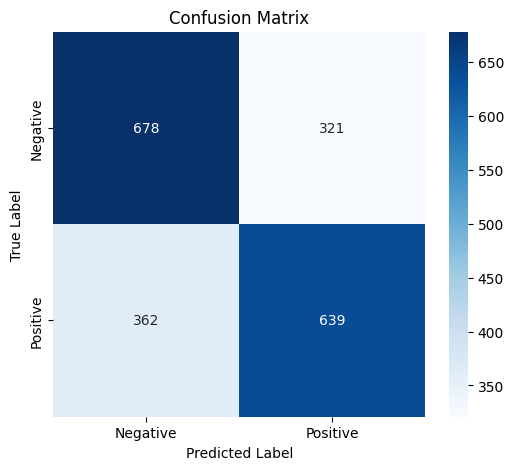

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Review: This movie was absolutely amazing! The story and acting were top-notch.
Predicted Sentiment: Positive (Confidence: 0.7172)
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Review: Terrible movie. The plot made no sense, and the characters were boring.
Predicted Sentiment: Negative (Confidence: 0.1516)
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Review: I liked it, but I wouldn't watch it again. Some parts were too slow.
Predicted Sentiment: Negative (Confidence: 0.1671)
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Review: One of the best films of the decade! Highly recommended.
Predicted Sentiment: Positive (Confidence: 0.6226)
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Review: Worst movie I've ever seen. Complete waste of time.


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import kagglehub
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Download the IMDb dataset
df_path = kagglehub.dataset_download("lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

# Locate the CSV file
for filename in os.listdir(df_path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(df_path, filename)
        break

# Load dataset
df = pd.read_csv(csv_file_path)

# Keep relevant columns and convert labels
df = df[['review', 'sentiment']]
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Sample 10,000 reviews or the maximum available
sample_size = min(10000, len(df))
df = df.sample(sample_size, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Hyperparameters
MAX_VOCAB = 10000
MAX_LEN = 100

# Tokenization
tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_VOCAB, 64, input_length=MAX_LEN),
    tf.keras.layers.SimpleRNN(64, return_sequences=False, kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), metrics=['accuracy'])

# Callbacks
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Train model
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=20, batch_size=32,
    callbacks=[early_stop, reduce_lr]
)

# Save model
model.save("simple_rnn_imdb_sentiment.h5")

print("Model training complete and saved as simple_rnn_imdb_sentiment.h5")

# --------------------
# Model Evaluation
# --------------------

# Load trained model
model = tf.keras.models.load_model("simple_rnn_imdb_sentiment.h5")

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Predict on test set
y_pred_probs = model.predict(X_test_pad)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# --------------------
# Sentiment Prediction Function
# --------------------

def predict_sentiment(review, model, tokenizer, max_len=100):
    seq = tokenizer.texts_to_sequences([review])
    pad_seq = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
    pred_prob = model.predict(pad_seq)[0][0]
    sentiment = "Positive" if pred_prob > 0.5 else "Negative"

    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {pred_prob:.4f})")
    print("-" * 60)

# Example movie reviews for testing
example_reviews = [
    "This movie was absolutely amazing! The story and acting were top-notch.",
    "Terrible movie. The plot made no sense, and the characters were boring.",
    "I liked it, but I wouldn't watch it again. Some parts were too slow.",
    "One of the best films of the decade! Highly recommended.",
    "Worst movie I've ever seen. Complete waste of time.",
    "Not bad, but could have been much better.",
    "A masterpiece! Brilliant direction and acting.",
    "I fell asleep while watching. It was that bad."
]

# Test predictions
for review in example_reviews:
    predict_sentiment(review, model, tokenizer)
